In [30]:
%matplotlib inline
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import (cross_val_score,KFold)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import (LabelEncoder,StandardScaler)
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
data = sklearn.datasets.load_breast_cancer()
target_names = data.target_names


In [9]:
tabla = pd.DataFrame(columns=data.feature_names, data=data.data)
tabla['Target'] = data.target
data.target
tabla.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [10]:
(tabla.loc[tabla.Target==0]).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


In [11]:
(tabla.loc[tabla.Target==1]).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090,1.0
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120,1.0
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


In [12]:
len(tabla.columns)
columnas = tabla.columns

In [13]:
def histogramas(tabla):
    fig, axes = plt.subplots(6,5, figsize=(15,15))
    axes = axes.reshape(-1,)
    for ind, ax in enumerate(axes):
        ax.hist((tabla.loc[tabla.Target==1])[columnas[ind]], bins=40, color='red', alpha=0.7, label='1')
        ax.hist((tabla.loc[tabla.Target==0])[columnas[ind]], bins=40, color='blue', alpha=0.7, label='0')
        plt.legend()
    fig.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

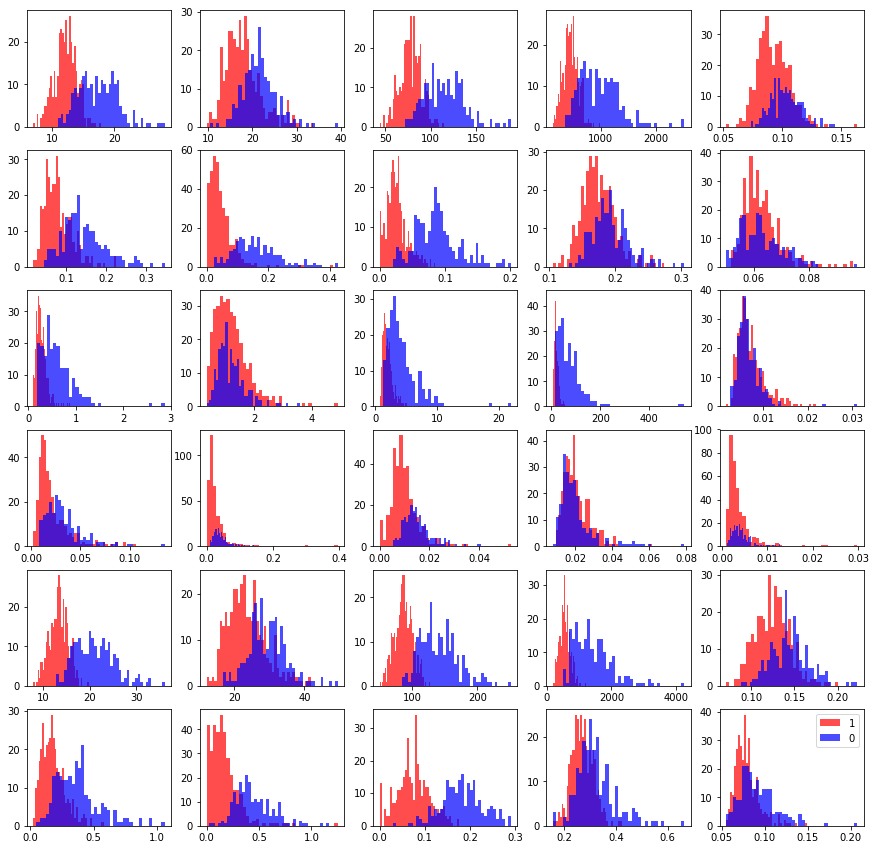

In [14]:
histogramas(tabla)

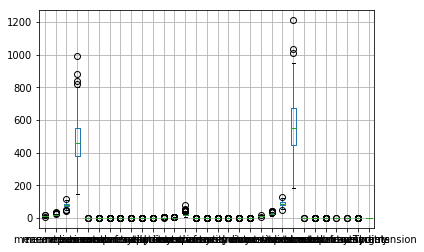

In [15]:
(tabla.loc[tabla.Target==1]).boxplot()

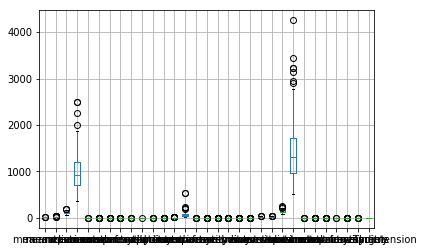

In [16]:
(tabla.loc[tabla.Target==0]).boxplot()

In [17]:
scaler = StandardScaler()
tablaescalada = scaler.fit_transform(tabla[columnas[:-1]])

In [18]:
tablaescalada = pd.DataFrame(data=tablaescalada, columns=columnas[:-1])

In [19]:
tablaescalada['Target'] = data.target

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

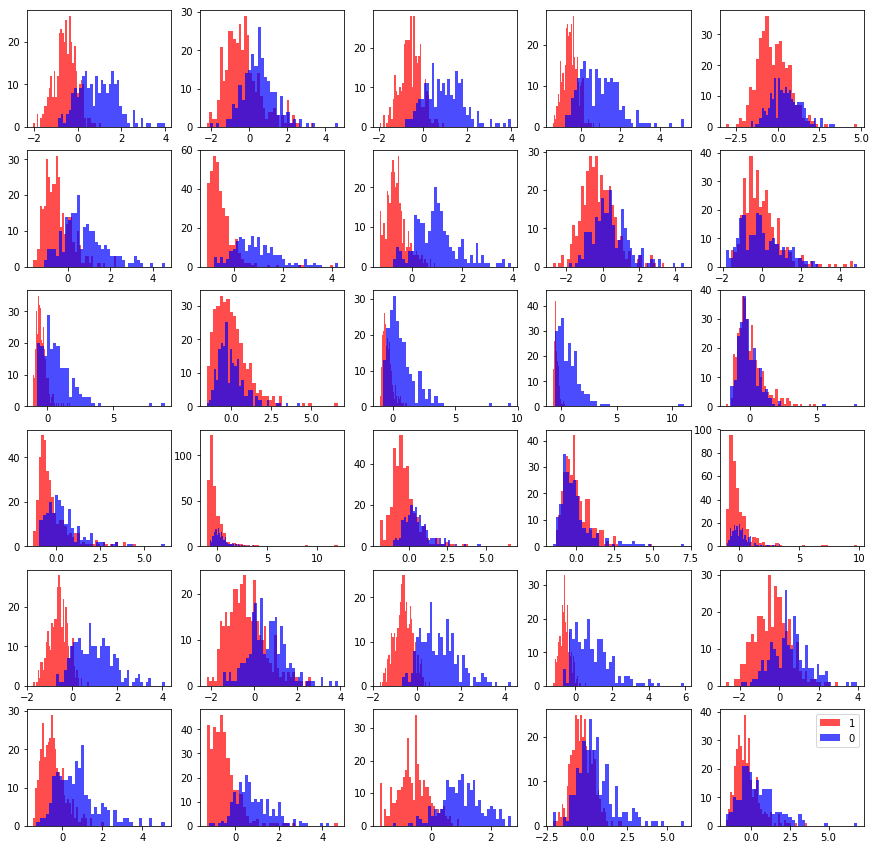

In [20]:
histogramas(tablaescalada)

In [21]:
len(tablaescalada.columns)

31

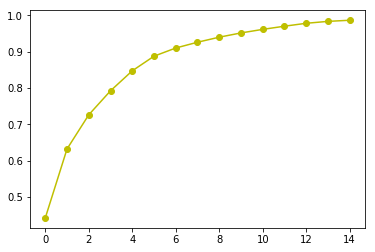

In [22]:
pca = PCA(n_components=15)
pca.fit(X=tablaescalada[tablaescalada.columns[:-1]])
tabla_transformada1 = pca.transform(X=tablaescalada[tablaescalada.columns[:-1]])
pca.explained_variance_ratio_
plt.plot(pca.explained_variance_ratio_.cumsum(), 'yo-')

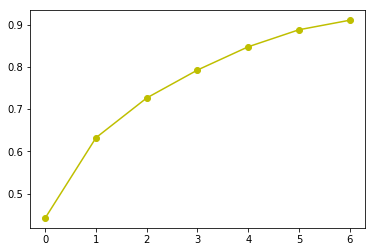

In [23]:
pca = PCA(n_components=0.9, svd_solver="full")
pca.fit(X=tablaescalada[tablaescalada.columns[:-1]])
tabla_transformada2 = pca.transform(X=tablaescalada[tablaescalada.columns[:-1]])
pca.explained_variance_ratio_
plt.plot(pca.explained_variance_ratio_.cumsum(), 'yo-')

In [24]:
help(PCA)


Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

In [25]:
def construye_tabla(arreglo):
    columns = ["componente %d" %i for i in range(arreglo.shape[1])]
    df = pd.DataFrame(data=arreglo, columns=columns)
    df["Target"] = data.target
    return df

tablapandas1 = construye_tabla(tabla_transformada1)
tablapandas2 = construye_tabla(tabla_transformada2)

In [26]:
tablapandas1.head()

,componente 0,componente 1,componente 2,componente 3,componente 4,componente 5,componente 6,componente 7,componente 8,componente 9,componente 10,componente 11,componente 12,componente 13,componente 14,Target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601792,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008974,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,0


In [27]:
tablapandas2.head()

,componente 0,componente 1,componente 2,componente 3,componente 4,componente 5,componente 6,Target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0


In [31]:
help(lda)

NameError: name 'lda' is not defined

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(X=tabla_transformada1, y=tabla['Target'])
X_lda = lda.transform(X=tabla_transformada1)
tabla['Target'] = LabelEncoder().fit_transform(y=tabla['Target'])
plt.figure()
svc = LinearSVC(C=1)

<Figure size 432x288 with 0 Axes>

In [33]:
cv = KFold(n_folds=10, n=len(tablapandas1))
pepe = Pipeline([
                 #('scaler', StandardScaler()),
                 #('pca', PCA(n_components=39)),
                 #('lda', LinearDiscriminantAnalysis()),
                 ('classifier', svc)
                ])
scores = cross_val_score(estimator=pepe, X=tablapandas1[tablapandas1.columns[:-1]], y=data.target, cv=cv)
print(scores.mean())

0.9666353383458647


In [34]:
data.target.sum()/len(data.target)

0.6274165202108963

In [35]:
def balancea(tabla):
    mask = data.target == 1
    tabla1 = tabla.loc[mask]
    tabla0 = tabla.loc[np.logical_not(mask)]
    tabla11reducida = tabla1.iloc[:212]
    tablafinal = pd.concat(objs=(tabla11reducida, tabla0), axis=0, ignore_index=True)
    return tablafinal

In [36]:
tablafinal2 = balancea(tablapandas2)
tablafinal1 = balancea(tablapandas1)

In [37]:
cv = KFold(n_folds=10, n=len(tablafinal1))
pepe = Pipeline([
                 #('scaler', StandardScaler()),
                 #('pca', PCA(n_components=39)),
                 #('lda', LinearDiscriminantAnalysis()),
                 ('classifier', svc)
                ])
scores = cross_val_score(estimator=pepe, X=tablafinal1[tablafinal1.columns[:-1]], y=tablafinal1.Target, cv=cv)
print(scores.mean())

0.9551495016611294


In [38]:
cv = KFold(n_folds=10, n=len(tablafinal2))
pepe = Pipeline([
                 #('scaler', StandardScaler()),
                 #('pca', PCA(n_components=39)),
                 #('lda', LinearDiscriminantAnalysis()),
                 ('classifier', svc)
                ])
scores = cross_val_score(estimator=pepe, X=tablafinal2[tablafinal2.columns[:-1]], y=tablafinal2.Target, cv=cv)
print(scores.mean())

0.9646179401993354


In [39]:
mlpc = MLPClassifier()

In [51]:
alpha = np.arange(.01, 2, .01)

In [41]:
activation = ["logistic"]

In [42]:
hidden_layer = (100,)

In [43]:
param_grid = {'alpha': alpha,
               'activation': activation,
               'hidden_layer_sizes': hidden_layer
                            }

In [44]:
grid = GridSearchCV(mlpc, cv=5, n_jobs=2, param_grid=param_grid)

In [45]:
grid.fit(X=tablaescalada, y=data.target)

C:\Users\ivan_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': array([0.01, 0.02, ..., 1.98, 1.99]), 'activation': ['logistic', 'identity', 'relu'], 'hidden_layer_sizes': (100,)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_activation',
 'param_alpha',
 'param_hidden_layer_sizes',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [47]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])

In [118]:
print(mean_scores)

[0.98594025 0.8629174  0.91564148 ... 0.99121265 0.64674868 0.99297012]


In [48]:
grid.best_estimator_

MLPClassifier(activation='identity', alpha=0.53, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [55]:
mean_scores1 = np.array(grid.cv_results_['mean_train_score'])

C:\Users\ivan_\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [56]:
print(mean_scores1)

[0.99209367 0.99209367 0.99209367 0.99209367 0.9929728  0.99165314
 0.9929728  0.9925342  0.9929728  0.9925342  0.9925342  0.99209367
 0.9925342  0.99209367 0.9925342  0.99209367 0.9925342  0.99209367
 0.99165507 0.9920956  0.99209367 0.9929728  0.99209367 0.99209367
 0.99209367 0.99165507 0.9929728  0.99253227 0.99253227 0.99209367
 0.99165314 0.99209367 0.99209367 0.99165507 0.99165507 0.99165314
 0.99165314 0.99165314 0.99121455 0.99165507 0.99209367 0.99121455
 0.99077595 0.99121455 0.99121648 0.99121648 0.99209367 0.99165314
 0.99165507 0.99077595 0.99165507 0.99121455 0.99121455 0.99121648
 0.99165314 0.99165314 0.99077595 0.99033735 0.99077595 0.99077595
 0.99121455 0.99077595 0.99121455 0.99077788 0.99077595 0.99077595
 0.99077595 0.99121455 0.99077595 0.99033735 0.98945629 0.99121455
 0.99033735 0.99077595 0.99077595 0.99077595 0.98989682 0.99077595
 0.99077595 0.99121455 0.98989682 0.99077595 0.98989682 0.99077595
 0.99033735 0.99033735 0.98989876 0.99077595 0.99033735 0.9898